<a href="https://colab.research.google.com/github/JorgeAnsotegui/TFM/blob/main/Scripts%20de%20detecci%C3%B3n%20de%20Video/VideoDetectionDetectron2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Conectar Colab a Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Install detectron2**

In [2]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core
# Note: This is a faster way to install detectron2 in Colab, but it does not include all functionalities (e.g. compiled operators).
# See https://detectron2.readthedocs.io/tutorials/install.html for full installation instructions
!git clone 'https://github.com/facebookresearch/detectron2'
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

# Properly install detectron2. (Please do not install twice in both ways)
# !python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 274.2/274.2 kB 7.4 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
Cloning into 'detectron2'...
remote: Enumerating objects: 15777, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 15777 (delta 7), reused 21 (delta 4), pack-reused 15743 (from 1)
Receiving objects: 100% (15777/15777), 6.35 MiB | 11.65 MiB/s, done.
Resolving deltas: 100% (11501/11501), done.
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your env

In [3]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2023 NVIDIA Corporation
Built on Tue_Aug_15_22:02:13_PDT_2023
Cuda compilation tools, release 12.2, V12.2.140
Build cuda_12.2.r12.2/compiler.33191640_0
torch:  2.4 ; cuda:  cu121
detectron2: 0.6


**Import detectron2**

In [4]:
#@markdown You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
from google.colab.patches import cv2_imshow
import random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

**Para descomprimir la carpeta de los modelos**

In [5]:
# # Rutas de los archivos zip en Google Drive
# ruta_zip = '/content/drive/MyDrive/TFM/models/modelos.zip'

# # Rutas de las carpetas destino
# ruta_destino = '/content'

In [6]:
# import os
# import zipfile

# # Crear la carpeta destino si no existen
# os.makedirs(ruta_destino, exist_ok=True)

# # Descomprimir los archivos zip
# with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
#     zip_ref.extractall(ruta_destino)

# print(f'Archivos descomprimidos en {ruta_destino}')

**Prueba de detección de obteos en video a tiempo real**

[09/22 13:08:21 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /content/drive/MyDrive/TFM/TFM/models/modelos/Detectron2_n_all.pth ...


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

Intervalo óptimo de procesamiento: cada 3 frames
Iniciando procesamiento del video...
Procesado: 100/1050 frames. Tiempo estimado restante: 88.66 segundos.


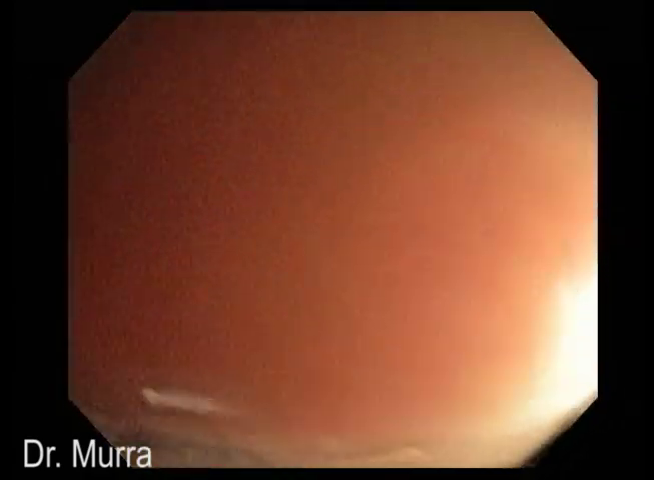

Procesado: 200/1050 frames. Tiempo estimado restante: 82.87 segundos.


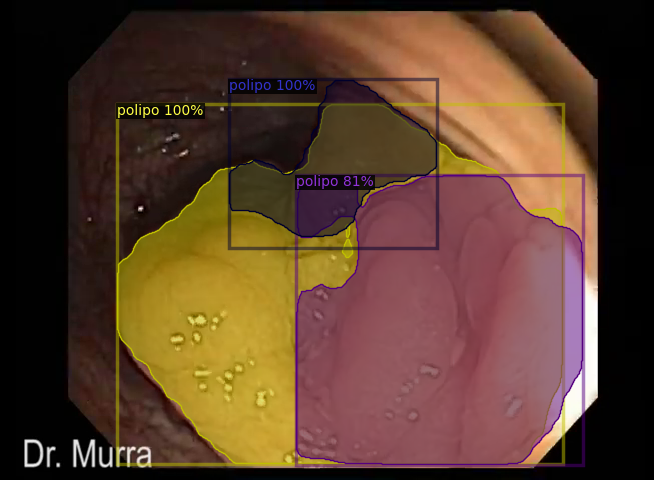

Procesado: 300/1050 frames. Tiempo estimado restante: 94.18 segundos.


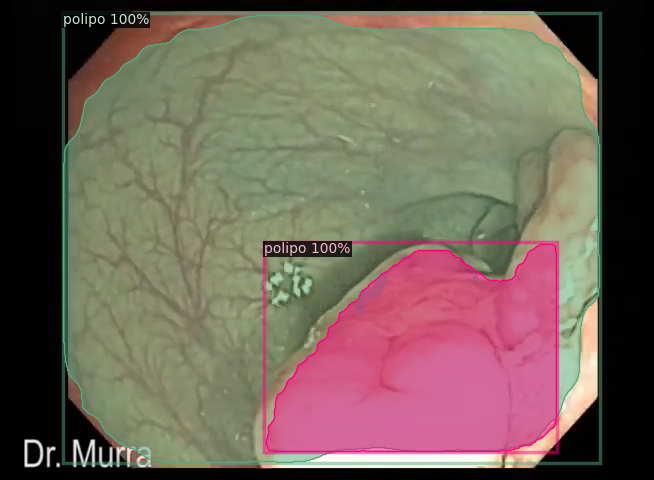

Procesado: 400/1050 frames. Tiempo estimado restante: 86.11 segundos.


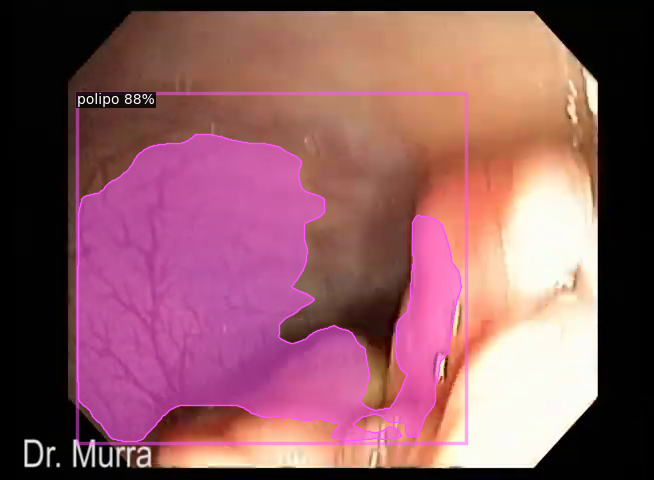

Procesado: 500/1050 frames. Tiempo estimado restante: 78.23 segundos.


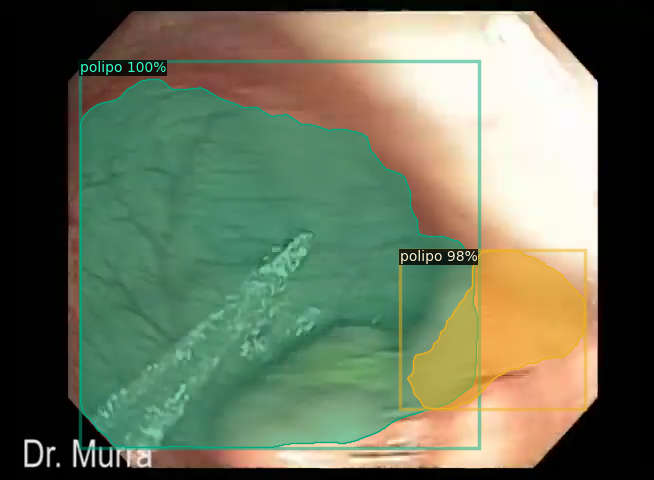

Procesado: 600/1050 frames. Tiempo estimado restante: 65.02 segundos.


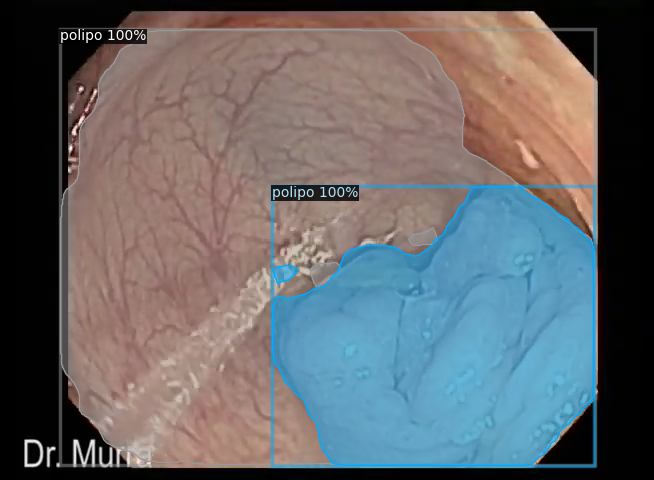

Procesado: 700/1050 frames. Tiempo estimado restante: 51.77 segundos.


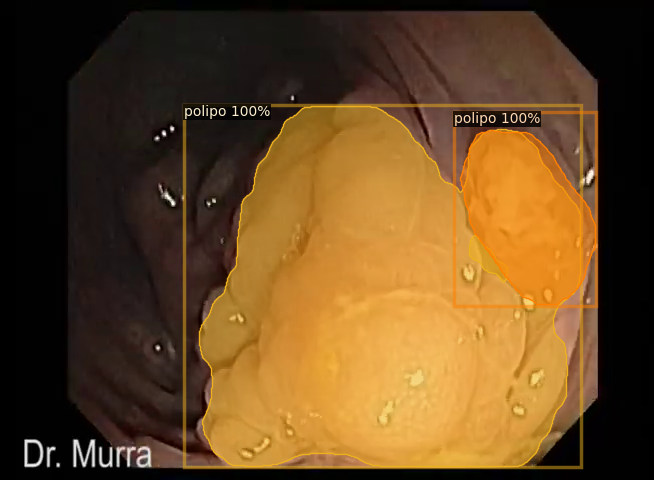

Procesado: 800/1050 frames. Tiempo estimado restante: 36.94 segundos.


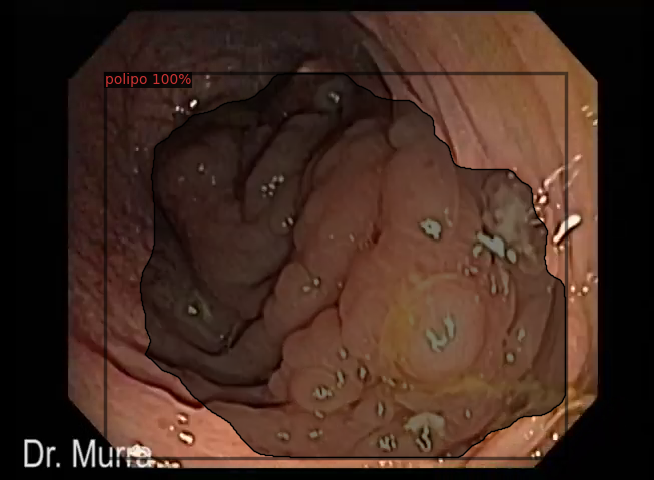

Procesado: 900/1050 frames. Tiempo estimado restante: 22.12 segundos.


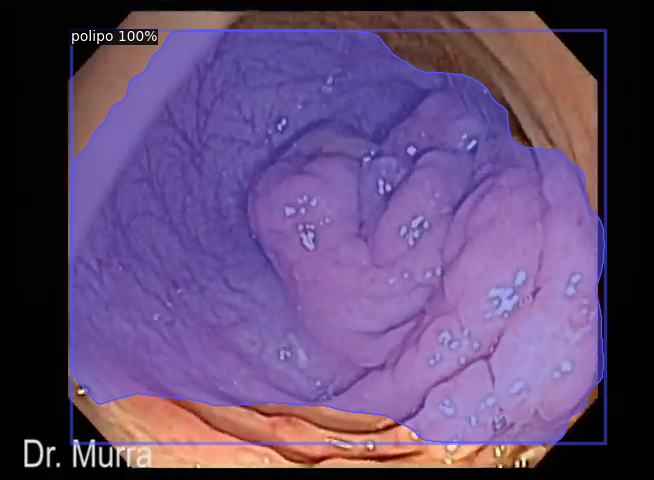

Procesado: 1000/1050 frames. Tiempo estimado restante: 7.42 segundos.


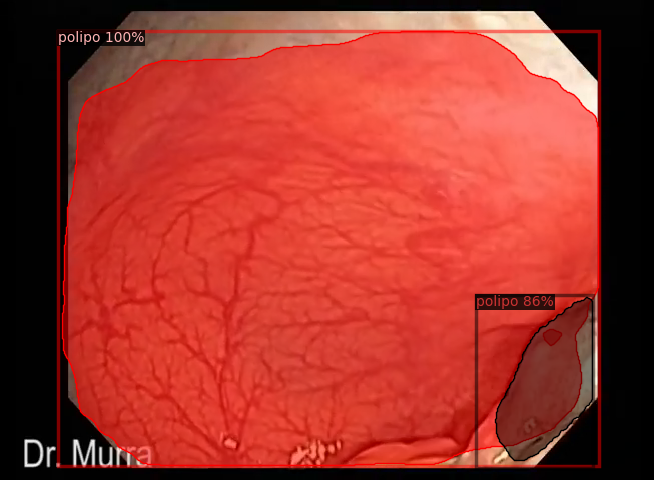

Procesamiento completado. Tiempo total: 156.08 segundos.
El video procesado se guardó en: Detectron2_n_all.mp4


In [9]:
import time
import os
import cv2
import numpy as np
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.structures import Instances

# Ruta del modelo personalizado entrenado
custom_model_path = "/content/drive/MyDrive/TFM/TFM/models/modelos/Detectron2_n_all.pth"

# Configuración para procesar video
video_path = "/content/drive/MyDrive/TFM/TFM/Cáncer Válvula Ileocecal 0:25 seg _1:05 .mp4"
initial_frames_to_test = 10  # Número de frames iniciales para medir el tiempo de procesamiento

# Obtener el nombre del modelo sin la extensión
model_name = os.path.splitext(os.path.basename(custom_model_path))[0]

# Definir la ruta de salida basada en el nombre del modelo
output_path = f"{model_name}.mp4"

# Configuración global de Detectron2
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = custom_model_path
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

# Definir la categoría personalizada
class_names = ["polipo"]

# Registrar el dataset personalizado
def get_polipo_dicts(dummy):
    return []  # No necesitamos datos reales aquí, solo los metadatos

# Obtener los metadatos personalizados
polipo_metadata = MetadataCatalog.get("polipo_dataset")
polipo_metadata.set(thing_classes=class_names)

# Función para cargar el modelo Detectron2 personalizado
def load_custom_detectron_model():
    return DefaultPredictor(cfg)

# Cargar el modelo personalizado
predictor = load_custom_detectron_model()

# Función para medir el tiempo de procesamiento y determinar la frecuencia óptima
def determine_processing_interval(video_path):
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count / fps

    start_time = time.time()
    for _ in range(initial_frames_to_test):
        ret, frame = cap.read()
        if not ret:
            break
        outputs = predictor(frame)
    processing_time = time.time() - start_time

    avg_processing_time_per_frame = processing_time / initial_frames_to_test
    max_processing_time_per_frame = 1 / fps
    optimal_processing_interval = max(1, int(round(avg_processing_time_per_frame / max_processing_time_per_frame)))

    cap.release()
    return optimal_processing_interval

# Función para procesar video y guardar el resultado con persistencia de máscaras
def process_video(video_path, output_path, process_every_n_frames):
    cap = cv2.VideoCapture(video_path)
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

    frame_count = 0
    start_time = time.time()
    last_instances = None

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % process_every_n_frames == 0:
            outputs = predictor(frame)
            last_instances = outputs["instances"].to("cpu")

        if last_instances is not None:
            v = Visualizer(frame[:, :, ::-1], metadata=polipo_metadata, scale=1)
            v = v.draw_instance_predictions(last_instances)
            processed_frame = v.get_image()[:, :, ::-1]
        else:
            processed_frame = frame

        out.write(processed_frame)
        frame_count += 1

        if frame_count % 100 == 0:
            elapsed_time = time.time() - start_time
            frames_remaining = total_frames - frame_count
            estimated_time = (elapsed_time / frame_count) * frames_remaining
            print(f"Procesado: {frame_count}/{total_frames} frames. Tiempo estimado restante: {estimated_time:.2f} segundos.")

        if frame_count % 100 == 0:
            cv2_imshow(processed_frame)

    cap.release()
    out.release()

    total_time = time.time() - start_time
    print(f"Procesamiento completado. Tiempo total: {total_time:.2f} segundos.")

# Determinar el intervalo óptimo de procesamiento
optimal_interval = determine_processing_interval(video_path)
print(f"Intervalo óptimo de procesamiento: cada {optimal_interval} frames")

# Llamada a la función para procesar el video
print("Iniciando procesamiento del video...")
process_video(video_path, output_path, optimal_interval)

print(f"El video procesado se guardó en: {output_path}")

In [12]:
import shutil
import os

# Archivo de origen
src_file = output_path  # Asegúrate de que esto sea el archivo, no un directorio

# Directorio de destino
dest_dir = "/content/drive/MyDrive/TFM/TFM/Videos"

def copy_file(src, dest_dir):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)

    dest_file = os.path.join(dest_dir, os.path.basename(src))
    shutil.copy2(src, dest_file)

# Copiar el archivo de origen al directorio de destino
copy_file(src_file, dest_dir)

print(f"Archivo copiado de {src_file} a {dest_dir}")


Archivo copiado de Detectron2_s_fix.mp4 a /content/drive/MyDrive/TFM/TFM/Videos
